# Instacart Customer Behavior and Product Analysis

# Contents <a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Data overview](#data_overview)
* [Stage 2. Data preprocessing](#data_preprocessing)
* [Stage 3. Data analyzing](#data_analyzing)
* [Findings](#end)

# Introduction 


# Data Description <a id='intro'></a>

This project is to analyze the data stored in Instacart dataset. That dataset consists of five tables: `'instacart_orders.csv'`, `'products.csv'`, `'aisles.csv'`, `'departments.csv'`, `'order_products.csv'`.
This particular dataset was publicly released by Instacart in 2017 for a Kaggle competition. The size of the dataset was redused so that calculations run faster, and missing and duplicate values were introduced. 
The purpose is to clean up the data and prepare a report that gives insight into the shopping habits of Instacart customers. 
 
My project consists of three stages:
 1. Data overview
 2. Data preprocessing
 3. Analyzing data
 
[Back to Contents](#back)

# Stage 1. Data overview  <a id='data_overview'></a>

Open the data and explore it.

In [1]:
# importing pandas, numpy and plotly.express libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# uploading each table from dataset with separator ';'
orders = pd.read_csv('/datasets/instacart_orders.csv', sep = ';')
products = pd.read_csv('/datasets/products.csv', sep = ';')
aisles = pd.read_csv('/datasets/aisles.csv', sep = ';')
departments = pd.read_csv('/datasets/departments.csv', sep = ';')
order_products = pd.read_csv('//datasets/order_products.csv', sep = ';')

In [3]:
# examening data from instacart_orders
display(orders.head(10))
print()
orders.info()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
5,1843871,20084,5,0,11,15.0
6,2511640,148233,40,3,8,2.0
7,2521283,97711,2,0,18,22.0
8,2266494,34954,40,5,15,4.0
9,446014,15356,2,4,8,10.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# examening data from products
display(products.head(10))
print()
products.info()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# examening data from aisles
display(aisles.head(10))
print()
aisles.info()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# examening data from departments
display(departments.head(10))
print()
departments.info()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# examening data from order_products
display(order_products.head(10))
print()
order_products.info(show_counts=True)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
5,2456893,21616,4.0,1
6,644579,12341,5.0,1
7,2231852,44925,10.0,1
8,3185766,36259,14.0,1
9,420019,23315,4.0,1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusions 

The data consists of five tables that store data about Instacart orders (who bought, what, where, when, amount) and about products (name, department, aisle).

It's clear that the data is sufficient to alalyze. However, there are missing values in `orders`, `products`, and `order_products` tables.

To move forward, we need to preprocess the data.

[Back to Contents](#back)

# Stage 2. Data preprocessing <a id='data_preprocessing'></a>

## 2.1. Find and remove duplicate values (and describe why you make your choices) <a 

### 2.1.1. `orders` data frame  

In [8]:
# checking for duplicated orders
orders.duplicated().sum()

15

Data has 15 duplicates. Let's look at them.

In [9]:
# printing table with duplicates
orders[orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


We can see that all duplicated orders were placed on Wednesday (`'order_dow'` = 3) at 2:00 AM (`'order_hour_of_day'` = 2). Let's check all orders placed on that day and time.

In [10]:
# checking for all orders placed Wednesday at 2:00 AM
orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


We can see that 121 orders were placed on Wednesday at 2AM, of which 15 were duplicated. Each order has unique order id, and we only interested in the unique orders in our analysis. Probably some rows were added to table twice by mistake. Let's remove those duplicates from the table.

In [11]:
# Remove duplicate orders
orders = orders.drop_duplicates()

In [12]:
# Double check for duplicate rows
orders.duplicated().sum()

0

In [13]:
# Double check for duplicate order IDs only
orders[orders.duplicated(subset='order_id')].sum()

order_id                  0.0
user_id                   0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64

There are no more duplicates in `orders` table.

### 2.1.2. `products` data frame

In [14]:
# Check for fully duplicate rows
products.duplicated().sum()

0

There are no fully duplicated rows id data.

In [15]:
# Check for just duplicate product IDs
products.duplicated(subset = 'product_id').sum()

0

There are no duplicated product IDs.

In [16]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'].str.lower().duplicated().sum()

1361

There are 1361 duplicated product names. That's a lot. Let's find out how many of those duplicates are not missing values?

In [17]:
# Check for duplicate product names that aren't missing
products[products['product_name'].notnull() & products['product_name'].str.lower().duplicated()].shape[0]

104

There are 104 duplicates out of 49694 `'product names'` in `products` table. That's less than 1%. Also, those duplicates already assigned to unique product_id, which already assigned to orders. We will keep those duplicates to ensure the integrity of the data for our analysis.

### 2.1.3. `departments` data frame

In [18]:
# checking for duplicates in department IDs
departments['department_id'].duplicated().sum()

0

In [19]:
# checking for duplicates in departments
departments['department'].duplicated().sum()

0

There are no duplicates in `departments` table.


### 2.1.4. `aisles` data frame

In [20]:
# checking for duplicates in aisle IDs
aisles['aisle_id'].duplicated().sum()

0

In [21]:
# checking for duplicates in aisles
aisles['aisle'].duplicated().sum()

0

There are no duplicates in `aisles` table.

### 2.1.5. `order_products` data frame

In [22]:
# Check for fully duplicate rows
order_products.duplicated().sum()

0

In column 'reordered' should be only 2 values - 1 or 0: 0 if the customer has never ordered this product before, 1 if they have. Let's check if it is.

In [23]:
# checking for unique values in 'reordered' column
order_products['reordered'].unique()

array([0, 1])

There are no duplicates in `order_products` column.

### Conclusions 

1. 14 duplicates were removed from `orders` table.
2. Implicit duplicates were found in `products` table in `'product_name'` column. They were not removed to keep the integrity of the data for our analysis.

## 2.2. Find and remove missing values


### 2.2.1. `products` data frame

In [24]:
# exploring missing values in 'product_name' column.
products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


We can see that missing product names assosiated with aisle 100 and department 21. Let's check if all of the missing product names assosiated with those aisle and department. 

In [25]:
# Are all of the missing product names associated with aisle ID 100?
products[products['product_name'].isna()]['aisle_id'].unique()

array([100])

In [26]:
# Are all of the missing product names associated with department ID 21?
products[products['product_name'].isna()]['department_id'].unique()

array([21])

All of the missing product names assosiated with aisle 100 and department 21. Let's find out what they are using `aisles` and `departments` tables. Maybe it will help us to fill in missing product names.

In [27]:
# What is this ailse and department?
print(aisles.loc[aisles['aisle_id'] == 100, 'aisle'])
print()
print(departments.loc[departments["department_id"] == 21, 'department'])

99    missing
Name: aisle, dtype: object

20    missing
Name: department, dtype: object


Aisle and department, both have value `'missing'`. So, let's fill in missing product names with `'Unknown'`.

In [28]:
# filling missing product names with 'Unknown'
products.loc[:, 'product_name'] = products['product_name'].fillna('Unknown')
# checking for missing values again
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


There are no more missing values in `products` table.

### `orders` data frame

In [29]:
# exploring missing values in 'days_since_prior_order' column.
orders[orders['days_since_prior_order'].isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


We can see that missing values assosiated with customer's first order. Let's check if all of the missing values assosiated with customer's first order.

In [30]:
# Are there any missing values where it's not a customer's first order?
orders[orders['order_number'] != 1].isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

All of the missing values assosiated with customer's first order. That means that there are 0 days since prior order. 

In [31]:
# filling missing value with 0 and changing column data type float to integer
# orders.loc[:, 'days_since_prior_order'] = orders['days_since_prior_order'].fillna(0).astype('int64')
# checking for missing values again
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


### 2.2.2. `order_products` data frame

In [32]:
# exploring missing values in 'add_to_cart_order' column.
order_products[order_products['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


To better understand how to handle missing values, we need to examine the table more closely. We can determine the range of sequential order in which each item was placed in the cart.    

In [33]:
# the range of values in 'add_to_cart_order' column
order_products['add_to_cart_order'].min(), order_products['add_to_cart_order'].max()

(1.0, 64.0)

We can calculate number of products in each order there the value of sequential order in which each item was placed in the cart is missing. For that we need to extract all order ids with missing values first.  

In [34]:
# creating list with all order IDs with at least one missing value in 'add_to_cart_order'
orders_with_missing_values = order_products[order_products['add_to_cart_order'].isna()]['order_id'].tolist()

In [35]:
# Do all orders with missing values have more than 64 products?
order_products.query("order_id in @orders_with_missing_values").groupby("order_id").size().sort_values()

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Length: 70, dtype: int64

As we can see, all orders with missing values have more than 64 products. Probably, for some reason, program counts only first 64 products. Everything above that number is interpreted as NaN.
So, let's fill in missiing values with 999, which is commonly used placeholder value in data analysis to represent missing data and it is easy to distinguish it from other values.

In [36]:
# replacing missing values with 999 and converting column data type float to integer.
order_products.loc[:, 'add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype('int64')
# checking for missing values again
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


There is no more missing values in `order_products` table.

### Conclusions 

1. Missing values were found in three tables: `orders`, `products`, `order_products`.
2. In `orders` table missing values in `'days_sinse_prior_order'` column were replaced with '0', sinse they are first orders. Also, data type of that column was changed from float to integer.
3. In `products` table missing values in `'product_name'` column were replaced with 'Unknown', sinse department and aisles formthem are `'missing'`.
4. In `order_products` table missing values in `'add_to_card_order'` column were replaced with '999 to be easy to destinguish. Also, data type of that column was changed from float to integer.


[Back to Contents](#back)

 # Stage 3. Analyzing data <a id='data_analyzing'></a>

## [A] Easy (must complete all to pass)  


### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)  

In [37]:
# calculating the min and max values in column 'order_hour_of_day'
orders['order_hour_of_day'].min(), orders['order_hour_of_day'].max()

(0, 23)

In [38]:
# calculating the min and max values in column 'order_dow'
orders['order_dow'].min(), orders['order_dow'].max()

(0, 6)

Values in columns `'order_hour_of_day'` and `'order_dow'`  in the `orders` table are sensible.

### [A2] What time of day do people shop for groceries?  

In [39]:
# determining the most popular time for shopping
orders['order_hour_of_day'].value_counts().head(1)

10    40578
Name: order_hour_of_day, dtype: int64

The most popular time for shopping is 10.00 AM. Let's look at the most popular time to shop for groceries clearly. 

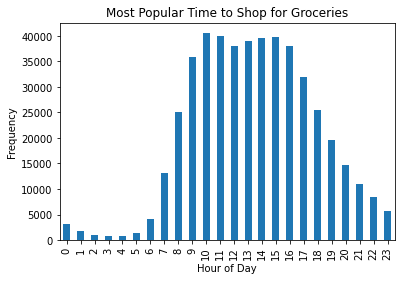

In [40]:
# bar chart 'Most popular time'
orders['order_hour_of_day'].value_counts().sort_index().plot(kind = 'bar',
                                                            title = 'Most Popular Time to Shop for Groceries',
                                                            ylabel = 'Frequency',
                                                            xlim = [0, 23],
                                                            xticks=range(24))
plt.xlabel('Hour of Day')
plt.show()

The pick time of day for grocery shopping is 10.00 a.m. The most popular range of time for shopping - 10.00 AM - 4.00 PM.

### [A3] What day of the week do people shop for groceries? 

In [41]:
# determining the most popular time for shopping
# Sunday as 0 is commonly used. This convention is based on the ISO 8601 standard for representing dates and times 
orders['order_dow'].value_counts().head(1)

0    84090
Name: order_dow, dtype: int64

The most popular day of week for grocery shopping is Sunday.  Let's look at the most popular day of week to shop for groceries clearly. 

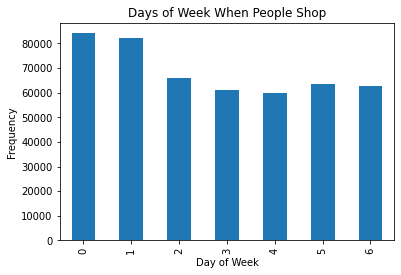

In [42]:
# bar chart 'Days of week'
orders['order_dow'].value_counts().sort_index().plot(kind='bar',
                                                    title = 'Days of Week When People Shop',
                                                    ylabel = 'Frequency',
                                                    xlim = [0, 6],
                                                    xticks=range(7))
plt.xlabel('Day of Week')
plt.show()

The most common day of the week for grocery shopping is Sunday, the day when most people are off work. On the second place, for some reason, is Monday.

### [A4] How long do people wait until placing another order? 

In [43]:
orders['days_since_prior_order'].mean()

11.101813900274362

On average, people wait 10 days until placing another order.

In [44]:
orders['days_since_prior_order'].median()

7.0

In [45]:
orders['days_since_prior_order'].mode()

0    30.0
dtype: float64

If we check the most common number of days people wait until placing another order, we get 30 (1 month). If we count median, we get 7 days (1 week).
Let's create plot to see clearly.

<function matplotlib.pyplot.show(close=None, block=None)>

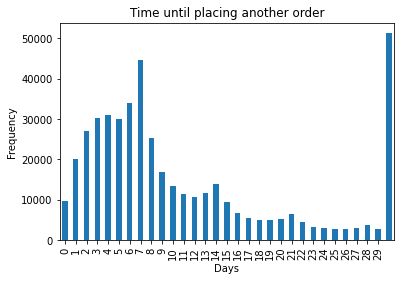

In [46]:
# plot'Time until placing another order'
orders['days_since_prior_order'].value_counts().sort_index().plot(kind = 'bar',
                                                            title = 'Time until placing another order',
                                                            ylabel = 'Frequency',
                                                            xlim = [0, 30],
                                                            xticks=range(30))
plt.xlabel('Days')
plt.show()

As we can see, typically people wait 30 days (1 month) until placing their next order. Least of all people wait 29 days until placing their next order. On a second place - 7 days (1 week). That says that there are some variation in  ordering habits of people, influenced probably by personal preferences.

## [B] Medium (must complete all to pass)  

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [47]:
# 'order_hour_of_day' distributions on Wednesdays
order_hod_wed = orders.loc[orders['order_dow'] == 3, 'order_hour_of_day']

In [48]:
# 'order_hour_of_day' distributions on Saturdays
order_hod_sat = orders.loc[orders['order_dow'] == 6, 'order_hour_of_day']

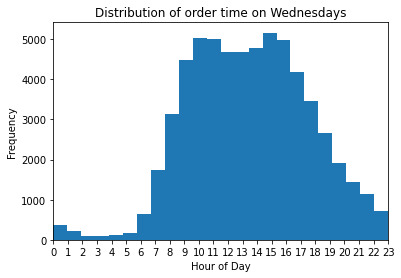

In [49]:
# plot for Wednesdays
order_hod_wed.plot(kind = 'hist', 
                   bins = 24, 
                   title = 'Distribution of order time on Wednesdays',
                   ylabel = 'Frequency',
                   xlim = [0, 23],
                   xticks=range(24))
plt.xlabel('Hour of Day')
plt.show()

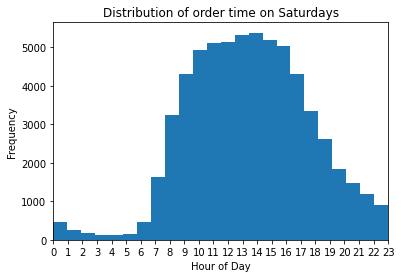

In [50]:
# plot for Saturdays
order_hod_sat.plot(kind = 'hist', 
                   bins = 24, 
                   title = 'Distribution of order time on Saturdays',
                   ylabel = 'Frequency',
                   xlim = [0, 23],
                   xticks=range(24))
plt.xlabel('Hour of Day')
plt.show()

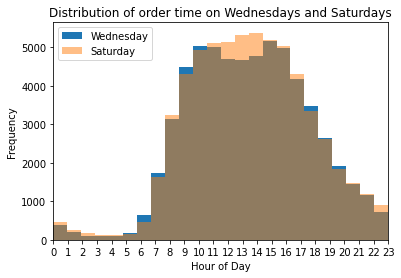

In [51]:
# both histograms
order_hod_wed.plot(kind = 'hist', 
                   bins = 24, 
                   title = 'Distribution of order time on Wednesdays and Saturdays',
                   ylabel = 'Frequency',
                   xlim = [0, 23],
                   xticks=range(24))
order_hod_sat.plot(kind = 'hist', 
                   bins = 24, 
                   alpha = 0.5)
plt.xlabel('Hour of Day')
plt.legend(['Wednesday', 'Saturday'])
plt.show()

The shape of two histograms is similar. They show low shopping activity during night time, but on Saturdays a little higher than on Wednesdays. In the morning shopping activity starts to grow. It gets to the busiest hours for shopping, and goes down during evening hours. The busiest shopping hours are 10.00 am - 17.00 pm, and here we can see significant difference in two graphs: on Wednesday, there are two picks during the busiest hours - 10.00 am - 12.00 am and 3.00 pm - 5.00 pm with the busiest hour falling between 3.00 pm and 4.00 pm. On Saturdays, shopping activity during the busiest hours continues to grow and reaches its peak at 2.00 pm. 
There are some differences in shopping behavior and preferences between Wednesdays and Saturdays. The specific peak hours and their intensity may reflect factors such as weekday routines, work schedules, and shopping patterns specific to each day. 

### [B2] What's the distribution for the number of orders per customer?

In [52]:
# counting the number of orders for each cusromer
orders_per_customer = orders.groupby('user_id')['order_id'].nunique()

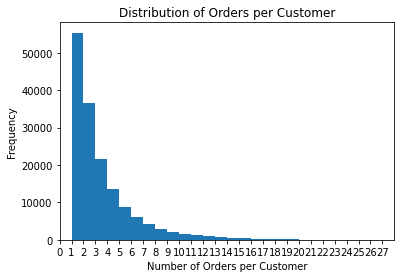

In [53]:
# histogram of distribution for the number of orders per customer
orders_per_customer.plot(kind = 'hist', 
                   bins = len(orders_per_customer.unique()), 
                   title = 'Distribution of Orders per Customer',
                   ylabel = 'Frequency',
                   xlim = [0, orders_per_customer.max()],
                   xticks=range(orders_per_customer.max()))
plt.xlabel('Number of Orders per Customer')
plt.show()

As we can see, most customers made just one order. Maybe that's because most of the customers are new, and they just testing new app.

### [B3] What are the top 20 popular products (display their id and name)?

In [54]:
# extracting top 20 most popular product IDs by counting the frequensy of each product 
# in order of popularity (descending)
top_20_product_id = order_products['product_id'].value_counts().head(20).index

In [55]:
# creating a DataFrame with the top 20 product IDs s
top_20_product_id = pd.DataFrame({'product_id': top_20_product_id})

In [56]:
# merging with 'products' table to extract product names 
top_20_product_id.merge(products, on = 'product_id')[['product_id', 'product_name']]

,product_id,product_name
0,24852,Banana
1,13176,Bag of Organic Bananas
2,21137,Organic Strawberries
3,21903,Organic Baby Spinach
4,47209,Organic Hass Avocado
5,47766,Organic Avocado
6,47626,Large Lemon
7,16797,Strawberries
8,26209,Limes
9,27845,Organic Whole Milk


In table above we can see top 20 most popular products. The most popular product - bananas, as they took first and second place (first - regular, secont - organic). Also, we can see that most of top 20 most popular products are organic products. People buy a lot of organic products, which is healthy and more expensive. 

## [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [57]:
# counting product amount for each order
items_per_order = order_products.groupby('order_id')['product_id'].count()

In [58]:
# determining the most common amount of products in order
items_per_order.mode() 

0    5
dtype: int64

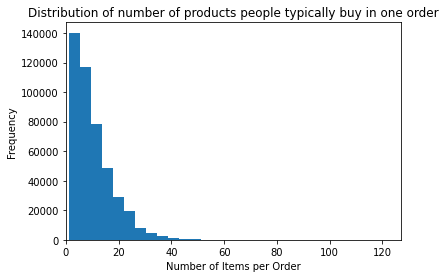

In [59]:
# histogram 'Distribution of number of products people typically buy in one order'
items_per_order.plot(kind = 'hist', 
                   bins = 30, 
                   title = 'Distribution of number of products people typically buy in one order',
                   ylabel = 'Frequency',
                   xlim = [0, items_per_order.max()])
plt.xlabel('Number of Items per Order')            
plt.show()

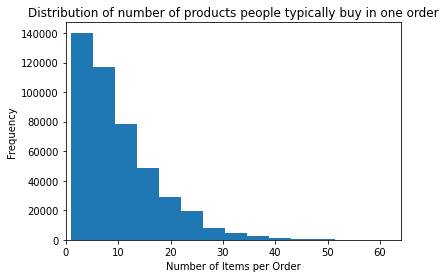

In [60]:
# closer look at histogram 
items_per_order
items_per_order.plot(kind = 'hist', 
                   bins = 30, 
                   title = 'Distribution of number of products people typically buy in one order',
                   ylabel = 'Frequency',
                   xlim = [0, 64])
plt.xlabel('Number of Items per Order')            
plt.show()

People typically buy 5 products in one order.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [61]:
# extracting top 20 product ids reordered most frequently in order of frequency (descending)
top20_id_reodered = order_products.query("reordered == 1")['product_id'].value_counts().head(20).index

In [62]:
# creating the DataFrame with top 20 most popular IDs
top20_id_reodered = pd.DataFrame({'product_id': top20_id_reodered})

In [63]:
# merging with 'products' table to get names of most popular products
top20_products = top20_id_reodered.merge(products, on = 'product_id')

In [64]:
# displaying table with top 20 product names and IDs
top20_products[['product_id', 'product_name']]

,product_id,product_name
0,24852,Banana
1,13176,Bag of Organic Bananas
2,21137,Organic Strawberries
3,21903,Organic Baby Spinach
4,47209,Organic Hass Avocado
5,47766,Organic Avocado
6,27845,Organic Whole Milk
7,47626,Large Lemon
8,27966,Organic Raspberries
9,16797,Strawberries


In table above we can see the top 20 products that are reordered most frequently. There is a strong correlation between products that are frequently reordered and products that are popular. 19 products in the top 20 frequently reordered table match products in the top 20 popular products table. The order of 6 first products in both tables is the same. After that order is a little differs, but products are the same. Only last product in both tables is different. The most frequently ordered product is bananas, the same as the most popular product. 

### [C3] For each product, what proportion of its orders are reorders?

To determine the proportion of reorders for each product we need to calculate the ratio of reordered orders to the total number of orders for that product.

In [65]:
# calculating the ratio of reordered orders to the total number of orders for that product
# filling missing values with 0 (product wasn't reordered)
proportion_reordered = (order_products.query("reordered == 1")['product_id'].value_counts() / 
                    order_products['product_id'].value_counts()).fillna(0)

In [66]:
# connecting to 'products' table to determine product names 
products_proportion_reordered = products[['product_id', 'product_name']].merge(proportion_reordered, 
                                                                  left_on = 'product_id', right_index = True)

In [67]:
# the final table of products with theirs proportions of reorders
products_proportion_reordered.drop('product_id_x', axis=1).rename(columns={'product_id_y': 'proportion_reordered'})

,product_id,product_name,proportion_reordered
0,1,Chocolate Sandwich Cookies,0.564286
1,2,All-Seasons Salt,0.000000
2,3,Robust Golden Unsweetened Oolong Tea,0.738095
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,0.510204
6,7,Pure Coconut Water With Orange,0.500000
...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,0.800000
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,0.430556
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,0.416667
49692,49693,SPRING WATER BODY WASH,0.440000


We created table of products with proportions of reorders for each product.

### [C4] For each customer, what proportion of their products ordered are reorders?

In [68]:
# calculating the ratio of products reordered to the total number of products pir each order
proportion_reordered = (order_products.query("reordered == 1").groupby('order_id')['product_id']
                            .sum()/order_products.groupby('order_id')['product_id'].sum()).fillna(0)

In [69]:
# putting output to DataFrame
proportion_reordered = pd.DataFrame({'order_id': proportion_reordered.index,
                                        'proportion_reordered': proportion_reordered.values})

In [70]:
# merging to 'orders' table to get user for each order
proportion_reordered_products = orders[['order_id', 'user_id']].merge(proportion_reordered, on = 'order_id')

In [71]:
# calculating proportion of reordered products for each user
proportion_reordered_products.groupby('user_id')['proportion_reordered'].mean()

user_id
2         0.038303
4         0.000000
5         0.783357
6         0.000000
7         0.983599
            ...   
206203    0.212027
206206    0.731450
206207    0.826339
206208    0.752158
206209    0.304036
Name: proportion_reordered, Length: 149626, dtype: float64

We calculated what proportion of each customer products ordered are reorders.

### [C5] What are the top 20 items that people put in their carts first? 

In [72]:
# extracting the top 20 products people put in their carts first
top20_id_first = order_products.query("add_to_cart_order == 1")['product_id'].value_counts().head(20).index

In [73]:
# creating DataFrame with top 20 products that people put in their carts first
top20_id_first = pd.DataFrame({'product_id': top20_id_first})

In [74]:
# merging to 'products' table to get product names
top20_id_first.merge(products, on = 'product_id')[['product_id', 'product_name']]

,product_id,product_name
0,24852,Banana
1,13176,Bag of Organic Bananas
2,27845,Organic Whole Milk
3,21137,Organic Strawberries
4,47209,Organic Hass Avocado
5,21903,Organic Baby Spinach
6,47766,Organic Avocado
7,19660,Spring Water
8,16797,Strawberries
9,27966,Organic Raspberries


In table above we can see the top 20 products that people put in their carts first. There is a strong correlation between products that people put in their carts first, products that are frequently reordered and products that are popular. Most products that were put in cart first match top 20 popular products and top 20 reordered products. And again, bananas and organic bananas take first and second places respectively.

# Findings <a id='end'></a>

After analyzing the data we concluded:
* The peak time for grocery shopping is around 10:00 a.m., with the most popular shopping hours falling between 10:00 a.m. and 4:00 p.m.
* Sundays and Mondays are the most common days for grocery shopping, indicating a higher demand during the early part of the week.
* There are some differences in shopping behavior and preferences between Wednesdays and Saturdays. On Wednesday, there are two picks during the busiest hours - 10.00 am - 12.00 am and 3.00 pm - 5.00 pm with the busiest hour falling between 3.00 pm and 4.00 pm. On Saturdays, shopping activity during the busiest hours continues to grow and reaches its peak at 2.00 pm. The busiest shopping hours are 10.00 am - 17.00 pm for both days.
* The majority of customers made just one order, which suggests a large number of new customers testing the app or service.
* Typically, people wait 30 days (1 month) until placing their next order.
* TYpically, customers purchase around 5 products in a single order.
* We calculated proportions of reorders for each product and what proportion of each customer products ordered are reorders.
* We created three top 20 tables:
       1. top 20 most popular products,
       2. top 20 products that are reordered most frequently,
       3. top 20 products that people put in their carts first.
* The most products in all three tables are the same. 
* Bananas and organic bananas consistently rank at the top of all three tables, indicating their popularity, frequent reordering, and high demand as the first choice for customers.
* Organic products dominate in all of the top 20 lists, suggesting a strong preference for healthier and potentially more expensive options among customers.


[Back to Contents](#back)